In [38]:
%matplotlib inline

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from dateutil import parser


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


print('Library Loaded')

Library Loaded


In [47]:
#  Heart Disease in Patients from Cleveland.
# https://www.mldata.io/dataset-details/heart_disease/
# 1=male; 0=female
# predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE
# data = 'heart.csv'
data = 'heart2.csv'

In [48]:
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
df.shape

(303, 14)

In [50]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [52]:
print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [53]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [55]:
# df = df.rename(columns={"num": "target"})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


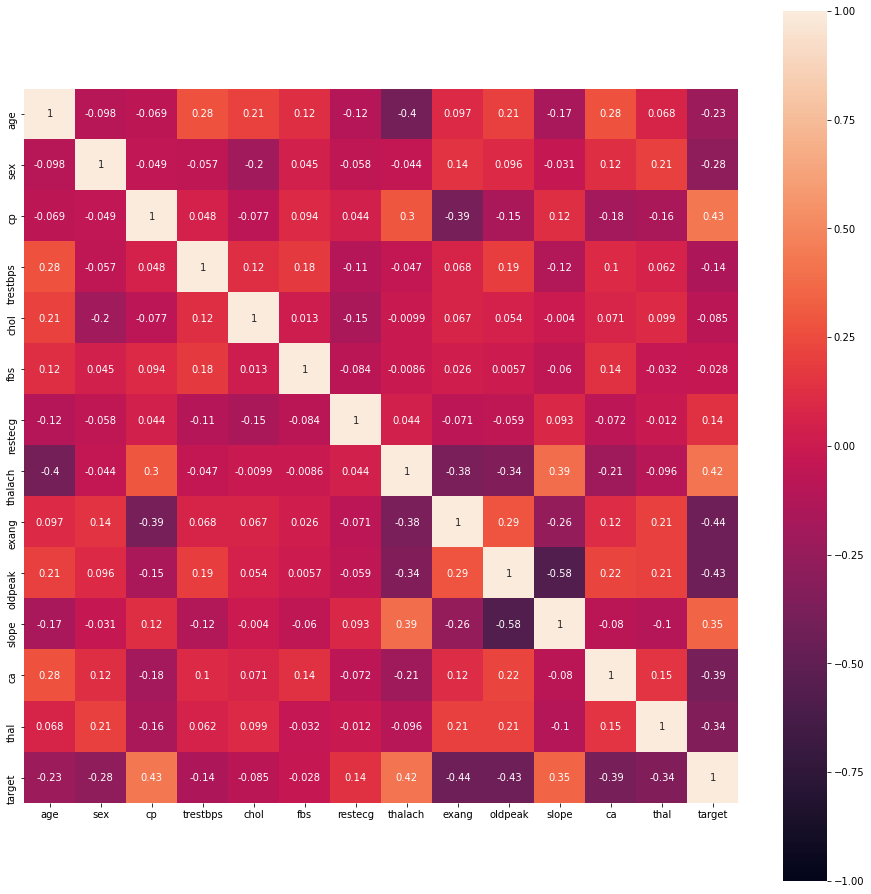

In [56]:
# Visualization

corrmat = df.corr()
fig = plt.figure(figsize = (16, 16))

sns.heatmap(corrmat, vmax = 1, square = True, annot = True, vmin= -1)
plt.show()


/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plot

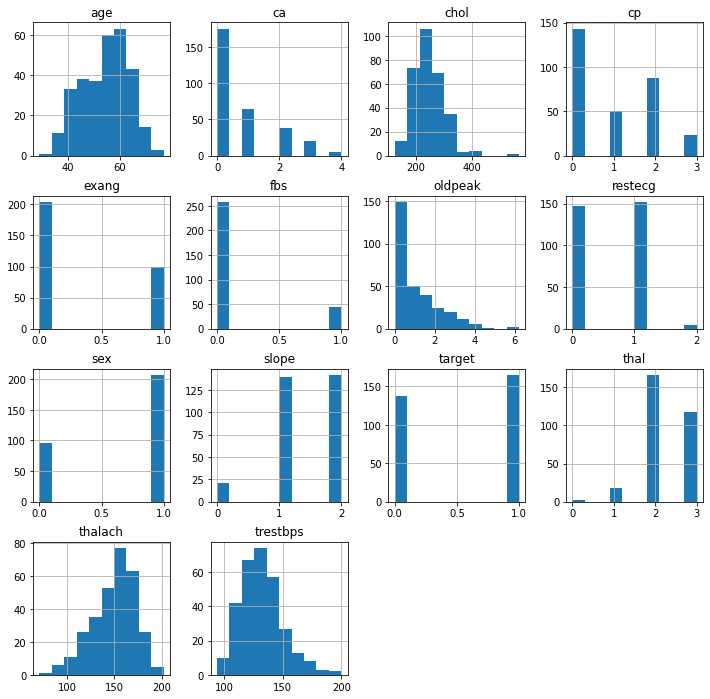

In [57]:
df.hist(figsize = (12, 12))
plt.show()

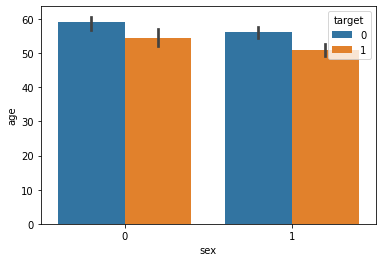

In [58]:
sns.barplot(x='sex', y='age', hue='target', data=df)

/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/pytho

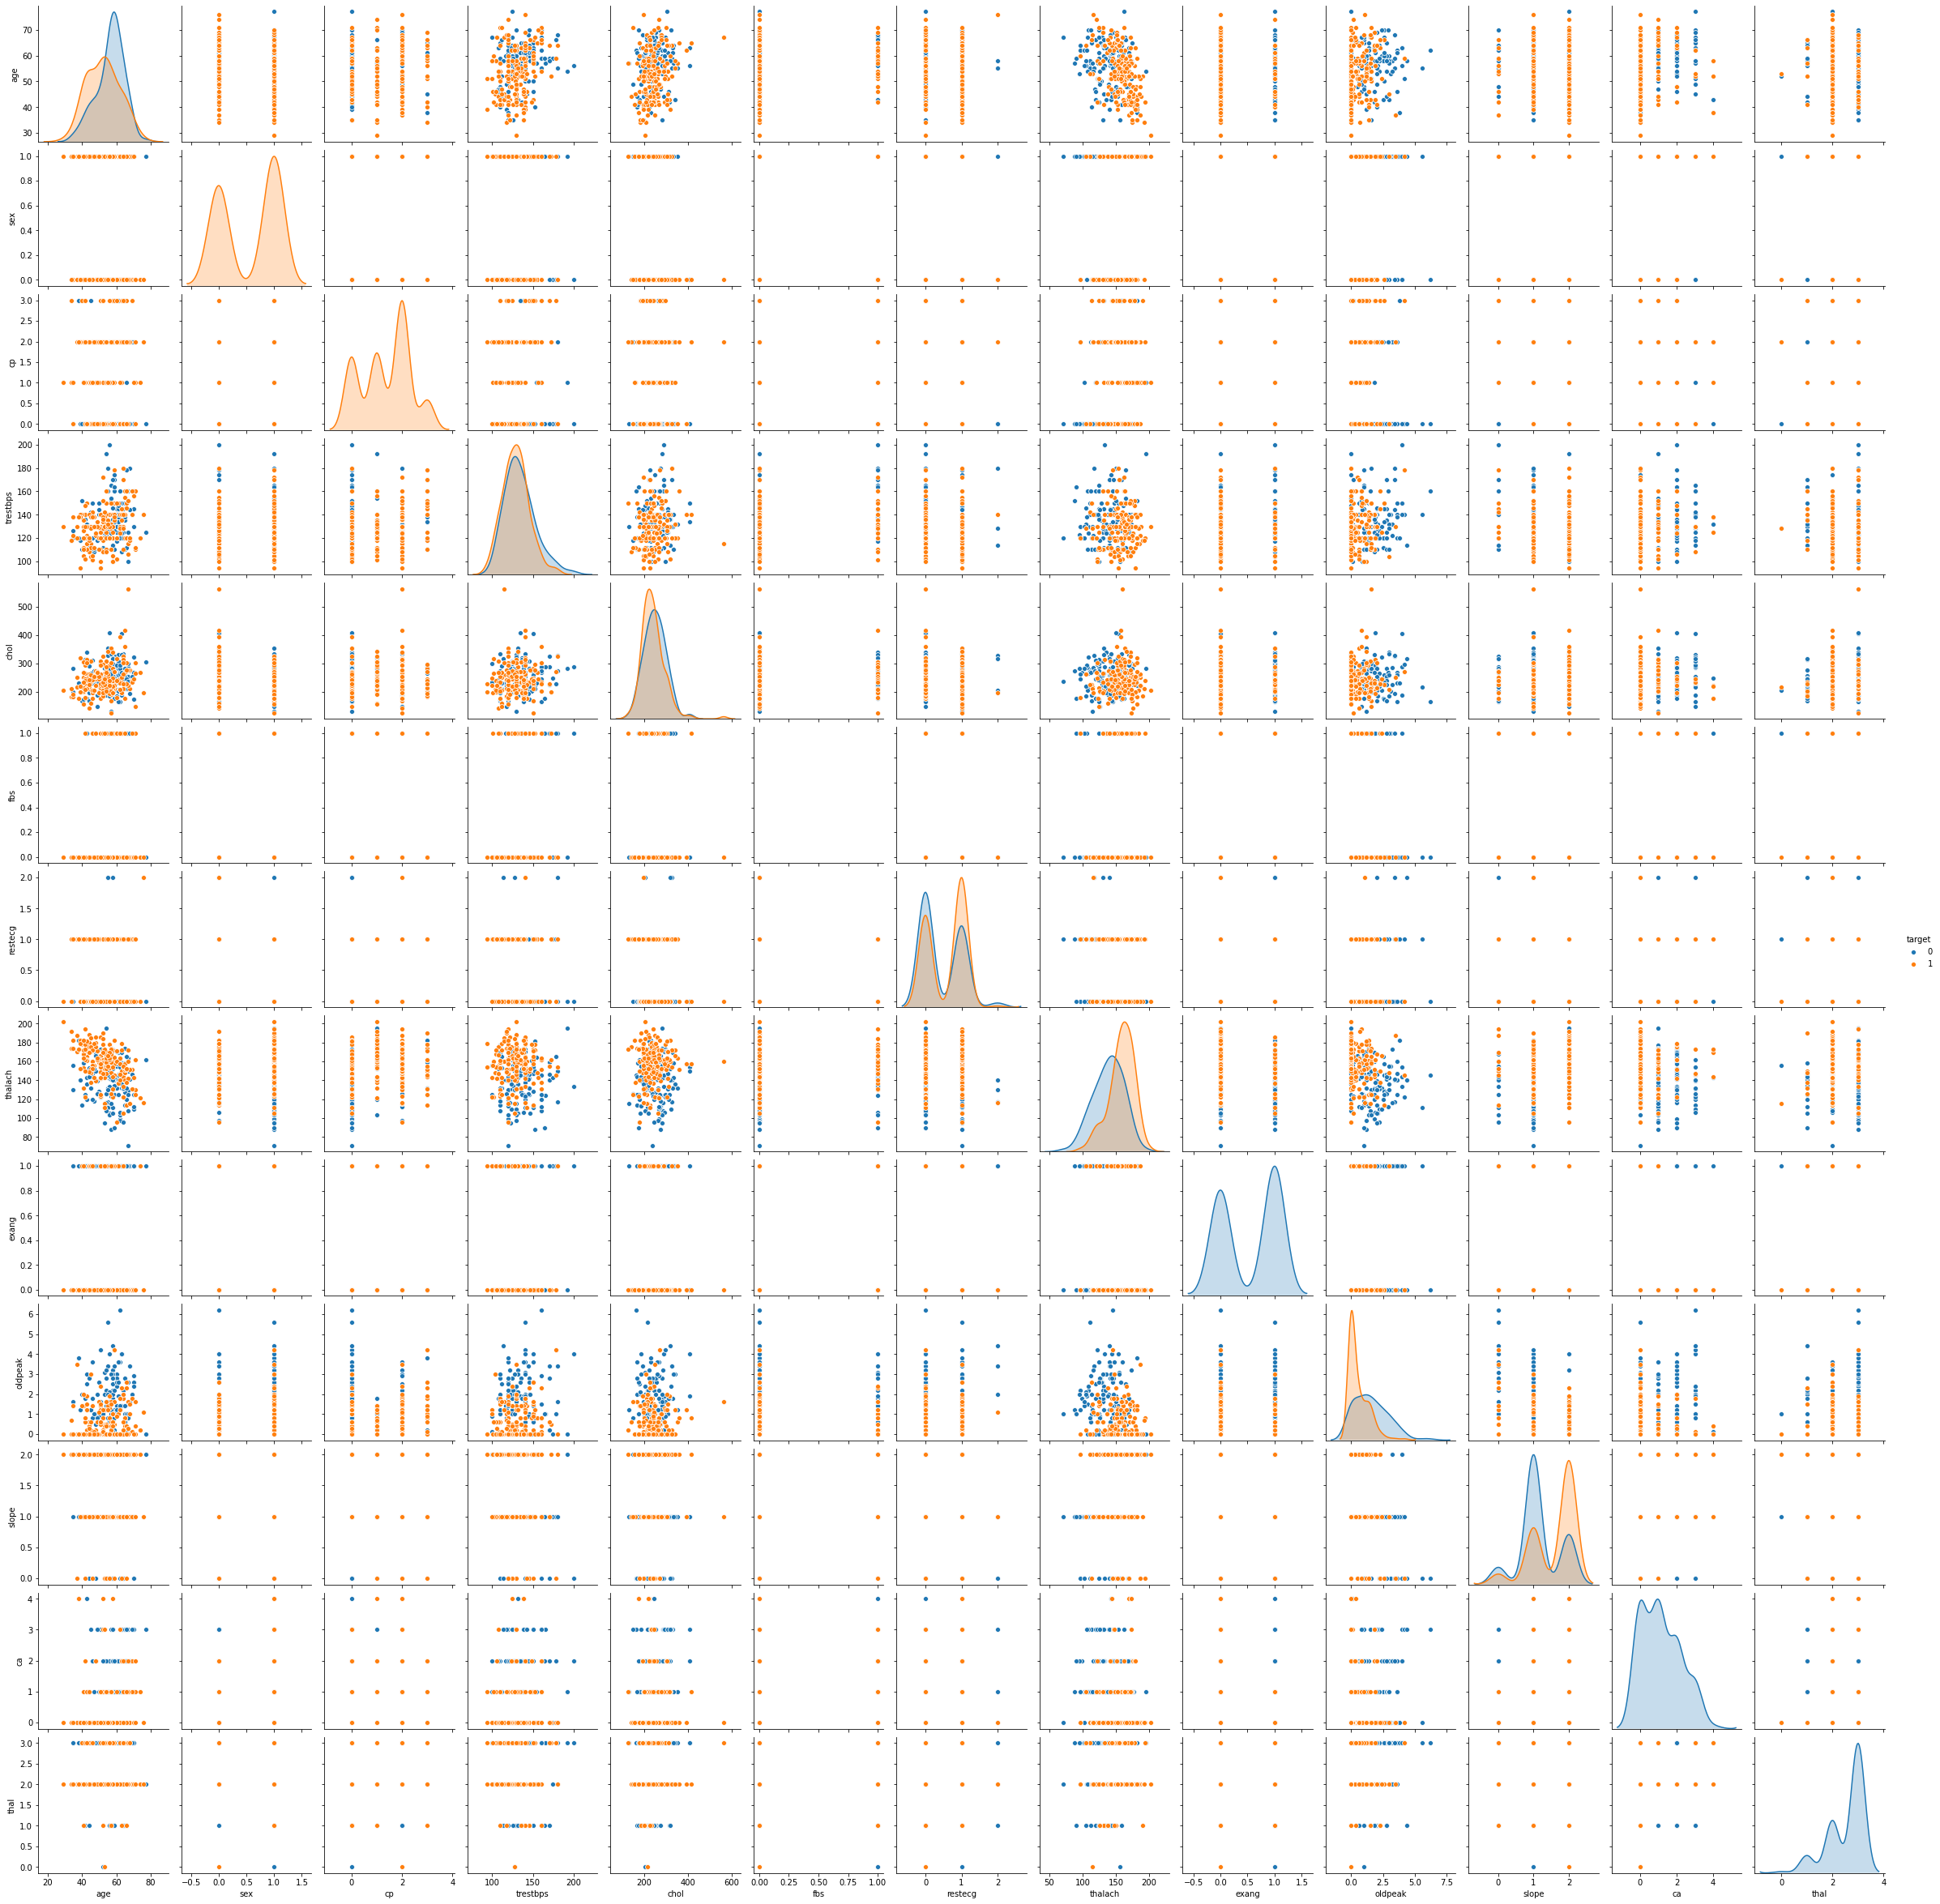

In [59]:
sns.pairplot(df, hue='target',)




In [60]:
X = df.drop('target', axis = 1)
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(time_start)

df_tsne = TSNE(random_state=10).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

1592973865.34572
t-SNE done! Time elapsed: 2.294585943222046 seconds


In [16]:
df_tsne

array([[  2.0007324 ,   0.24844562],
       [-12.029026  ,  15.606147  ],
       [ 17.736412  ,  -4.9546223 ],
       [ -9.481301  ,  -5.8363733 ],
       [  7.5476823 , -16.974148  ],
       [ -5.4272594 ,  -5.345256  ],
       [-12.315846  ,   6.724011  ],
       [-28.946558  ,  22.084032  ],
       [ -2.3945022 ,   6.5534706 ],
       [ 14.125428  , -16.305553  ],
       [ 16.71761   , -16.661623  ],
       [-19.786463  ,  16.034225  ],
       [ -3.9538643 ,   7.3504944 ],
       [-11.527343  ,  -1.0019006 ],
       [  0.5675081 , -18.38329   ],
       [ 16.273449  , -22.705467  ],
       [  6.721321  ,  -7.6817813 ],
       [ -1.067994  ,  -3.2486901 ],
       [ -7.741682  ,   9.253552  ],
       [-10.794405  ,   1.5555421 ],
       [ 15.732099  ,  -6.771045  ],
       [-16.711077  ,  10.0363245 ],
       [-16.672268  ,  25.712227  ],
       [  1.0753227 ,  -9.037171  ],
       [ 19.70679   , -10.471588  ],
       [  7.3924437 ,  -9.679734  ],
       [-27.890112  ,  23.762827  ],
 

In [61]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    #     choose a color palette with seaborn
    num_classes = len( np.unique(colors))
    palette = np.array(sns.color_palette('deep', num_classes))
    
    # create a scatter plot
    f = plt.figure(figsize = (8,8))
    ax = plt.subplot(aspect = 'equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    # add the labels for each digit corresponding to the label
    txts = []
    
    for i in range(num_classes):
        
        # position of each label at median of data points
        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
        txts.append(txt)
    
    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-1.3534312, -3.0909379, '0'), Text(2.6605806, 3.761572, '1')])

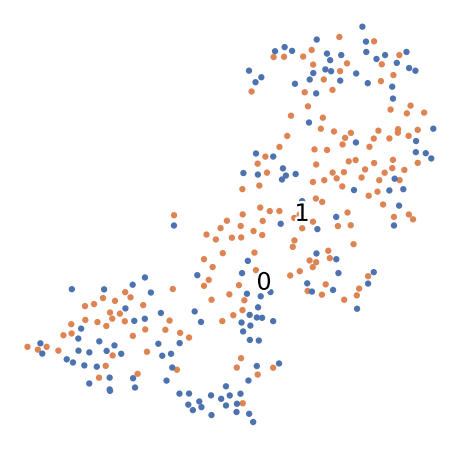

In [62]:
fashion_scatter(df_tsne, df.target)

In [63]:
# Feature Engineering

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [64]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [65]:
print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [66]:
X= df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :', len(X_train))
print('Test Set :', len(X_test))
print('Training Labels :', len(y_train))
print('Test Labels :', len(y_test))



Training Set : 272
Test Set : 31
Training Labels : 272
Test Labels : 31


In [30]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0, strategy = 'mean')

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)
X_test

array([[ 5.80000000e+01,  1.00000000e+00,  4.00000000e+00,
         1.00000000e+02,  2.34000000e+02,  1.00000000e+00,
         1.94117647e+00,  1.56000000e+02,  1.00000000e+00,
         1.00000000e-01,  1.00000000e+00,  1.00000000e+00,
         7.00000000e+00],
       [ 5.90000000e+01,  1.00000000e+00,  1.00000000e+00,
         1.78000000e+02,  2.70000000e+02,  1.00000000e+00,
         2.00000000e+00,  1.45000000e+02,  1.00000000e+00,
         4.20000000e+00,  3.00000000e+00, -5.55383333e+03,
         7.00000000e+00],
       [ 6.60000000e+01,  1.00000000e+00,  4.00000000e+00,
         1.12000000e+02,  2.12000000e+02,  1.00000000e+00,
         2.00000000e+00,  1.32000000e+02,  1.00000000e+00,
         1.00000000e-01,  1.00000000e+00,  1.00000000e+00,
         3.00000000e+00],
       [ 5.60000000e+01,  1.00000000e+00,  4.00000000e+00,
         2.00000000e+02,  2.88000000e+02,  1.00000000e+00,
         2.00000000e+00,  1.33000000e+02,  1.00000000e+00,
         4.00000000e+00,  3.00000000e

In [67]:
#  Model  Building and Evaluation

def FitModel(X_train, y_train, X_test, y_test, algo_name, algorithm, gridSearchParams, cv):
    np.random.seed(10)
    
    
    grid=GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm=confusion_matrix(y_test, pred)
    
    print(pred)
    with open(algo_name + '.pkl', 'wb') as to_write:
        pickle.dump(grid_result, to_write)
#     pickle.dump(grid_result, open(algo_name, 'wb'))
    
    
    print('Best Params: ', best_params)
    print('Classification Report :' , classification_report(y_test, pred))
    print('Accuracy Score :' , str(accuracy_score(y_test, pred)))
    print('Confusion Matrix : \n', cm)
    

In [68]:
# Logistic Regression

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization penalty space
C = np.logspace(0, 4, 10)

#  Create hyperparameter options
hyperparameters = dict(C=C, penalty= penalty)

FitModel(X_train, y_train, X_test, y_test, 'LogisticRegression', LogisticRegression(), hyperparameters, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s


[0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'C': 1.0, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.77      0.77      0.77        13

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

Accuracy Score : 0.8064516129032258
Confusion Matrix : 
 [[15  3]
 [ 3 10]]


[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    3.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
# XGBoost

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7],
    'learning_rate': np.arange(0.01, 0.1, 0.01).tolist()
}


FitModel(X_train, y_train, X_test, y_test, 'XGBoost', XGBClassifier(), param, cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  4.7min finished


[0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1]
Best Params:  {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.79      0.85      0.81        13

    accuracy                           0.84        31
   macro avg       0.83      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

Accuracy Score : 0.8387096774193549
Confusion Matrix : 
 [[15  3]
 [ 2 11]]


In [70]:
#  Random Forest

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7]
}


FitModel(X_train, y_train, X_test, y_test, 'Random Forest', RandomForestClassifier() , param, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.8min finished


[0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'max_depth': 3, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.80      0.92      0.86        13

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31

Accuracy Score : 0.8709677419354839
Confusion Matrix : 
 [[15  3]
 [ 1 12]]


In [71]:
# SVC

param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_train, y_train, X_test, y_test, 'SVC', SVC(), param, cv=5)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'C': 100, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.75      0.92      0.83        13

    accuracy                           0.84        31
   macro avg       0.84      0.85      0.84        31
weighted avg       0.86      0.84      0.84        31

Accuracy Score : 0.8387096774193549
Confusion Matrix : 
 [[14  4]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.8s finished


In [72]:
# Correcting the Mistake

print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [73]:
final_cols = cols
final_cols = list(final_cols)
final_cols.remove('sex')
final_cols.remove('target')
final_cols.remove('age')
final_cols

['cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [74]:
X= df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :', len(X_train))
print('Test Set :', len(X_test))
print('Training Labels :', len(y_train))
print('Test Labels :', len(y_test))


Training Set : 272
Test Set : 31
Training Labels : 272
Test Labels : 31


In [75]:
from sklearn.impute import SimpleImputer
# impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0, strategy = 'mean')

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])
X_test

array([[1.87500000e+00, 1.34000000e+02, 4.09000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.50000000e+02, 1.00000000e+00, 1.90000000e+00,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 1.12000000e+02, 2.30000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.65000000e+02, 1.00000000e+00, 2.50000000e+00,
        1.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 1.25000000e+02, 3.09000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.31000000e+02, 1.00000000e+00, 1.80000000e+00,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [1.87500000e+00, 1.12000000e+02, 2.04000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.43000000e+02, 1.00000000e+00, 1.00000000e-01,
        2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       [1.87500000e+00, 1.50000000e+02, 2.43000000e+02, 1.00000000e+00,
        1.00000000e+00, 1.28000000e+02, 1.00000000e+00, 2.60000000e+00,
        1.00000000e+00, 2.00000000e+00, 3.00000000e+

In [76]:
# refitting the model

# Random Forest

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7]
}


FitModel(X_train, y_train, X_test, y_test, 'Random Forest', RandomForestClassifier() , param, cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.0min finished


[0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'max_depth': 3, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.86      0.92      0.89        13

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[16  2]
 [ 1 12]]


In [77]:
# SVC

param = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

FitModel(X_train, y_train, X_test, y_test, 'SVC', SVC(), param, cv=5)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.7s


[1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1]
Best Params:  {'C': 100, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.60      0.92      0.73        13

    accuracy                           0.71        31
   macro avg       0.75      0.74      0.71        31
weighted avg       0.78      0.71      0.71        31

Accuracy Score : 0.7096774193548387
Confusion Matrix : 
 [[10  8]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.0s finished


In [78]:
# Logistic Regression

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization penalty space
C = np.logspace(0, 4, 10)

#  Create hyperparameter options
hyperparameters = dict(C=C, penalty= penalty)

FitModel(X_train, y_train, X_test, y_test, 'LogisticRegression', LogisticRegression(), hyperparameters, cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params:  {'C': 2.7825594022071245, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# XGBoost

param = {
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'max_depth': [2,3,4,5,6,7],
    'learning_rate': np.arange(0.01, 0.1, 0.01).tolist()
}


FitModel(X_train, y_train, X_test, y_test, 'XGBoost', XGBClassifier(), param, cv=5)